## BIKE SHARING ASSIGNMENT by Manish Tyagi

In [58]:
#Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [59]:
#Read input file 
df=pd.read_csv('/Users/priyankagharpure/Desktop/Manish/MS - ML:AI from IIIT&LJMU/git/course3/day.csv')

In [60]:
#Initial view of data
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [61]:
#Analyse the columns 

df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [62]:
#check  null values in dataset

count=df.isnull().sum()
print(count)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [63]:
#check data types of columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [64]:
#from the given data we can see that column 'Index' has no business significance and can be dropped 
df.drop(['instant'],axis=1,inplace=True)

In [65]:
#column 'dteday' and 'yr', 'month' have same data,  so we can drop dteday to avoid redundancy

df.drop(['dteday'],axis=1,inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [66]:
#verify the dropped column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 80.0 KB


In [67]:
#columns 'casual'+'registered'='cnt' and 'cnt' is our target variable, we will not consider columns casual and registered
df.drop(['casual','registered'],axis=1,inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [68]:
##verify columns 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [13]:
#from data its evident that 'season','yr','mnth','holiday','weekday','workingday','weathersit' all are categorical variables
#We will replace season,weekday and weathersit with appropriate values

In [69]:
df['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
df.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,1321


In [70]:
#verify columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 68.6+ KB


In [71]:
df['weathersit'].replace({1:"Clear Few Clouds",2:"Mist cloudy",3:"Light rain Light snow Thunderstorm",4:'Heavy Rain Ice Pallets Thunderstorm Mist'},inplace=True)
df.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,Mist cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,Mist cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,Clear Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,Clear Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,Clear Few Clouds,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,4,1,Clear Few Clouds,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,5,1,Mist cloudy,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,6,0,Mist cloudy,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,0,0,Clear Few Clouds,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,1,1,Clear Few Clouds,6.184153,7.54440,48.2917,14.958889,1321


In [72]:
df['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)
df.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Saturday,0,Mist cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,Mist cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Monday,1,Clear Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,Clear Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,Clear Few Clouds,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,Thursday,1,Clear Few Clouds,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,Friday,1,Mist cloudy,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,Saturday,0,Mist cloudy,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,Sunday,0,Clear Few Clouds,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,Monday,1,Clear Few Clouds,6.184153,7.54440,48.2917,14.958889,1321


In [73]:
##verify columns 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


In [74]:
#changing datatypes of numerical columns 

df[['temp','atemp','hum','windspeed','cnt']]=df[['temp','atemp','hum','windspeed','cnt']].apply(pd.to_numeric)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


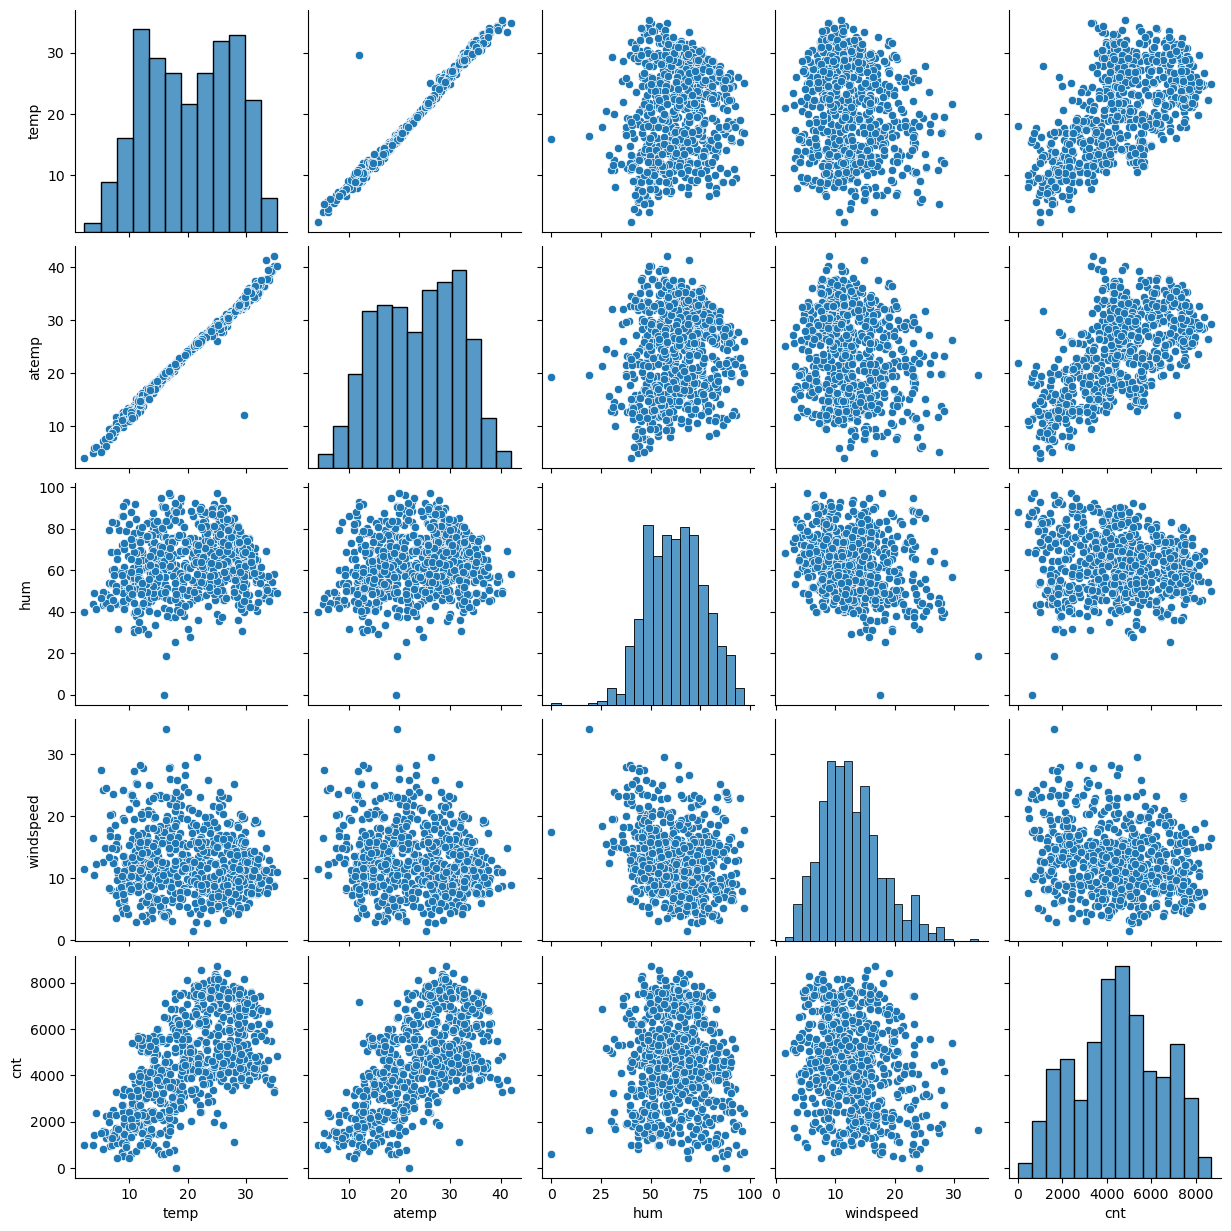

In [76]:
#Perform EDA 

#pairplots to understand correlation between variables  

sns.pairplot(df, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

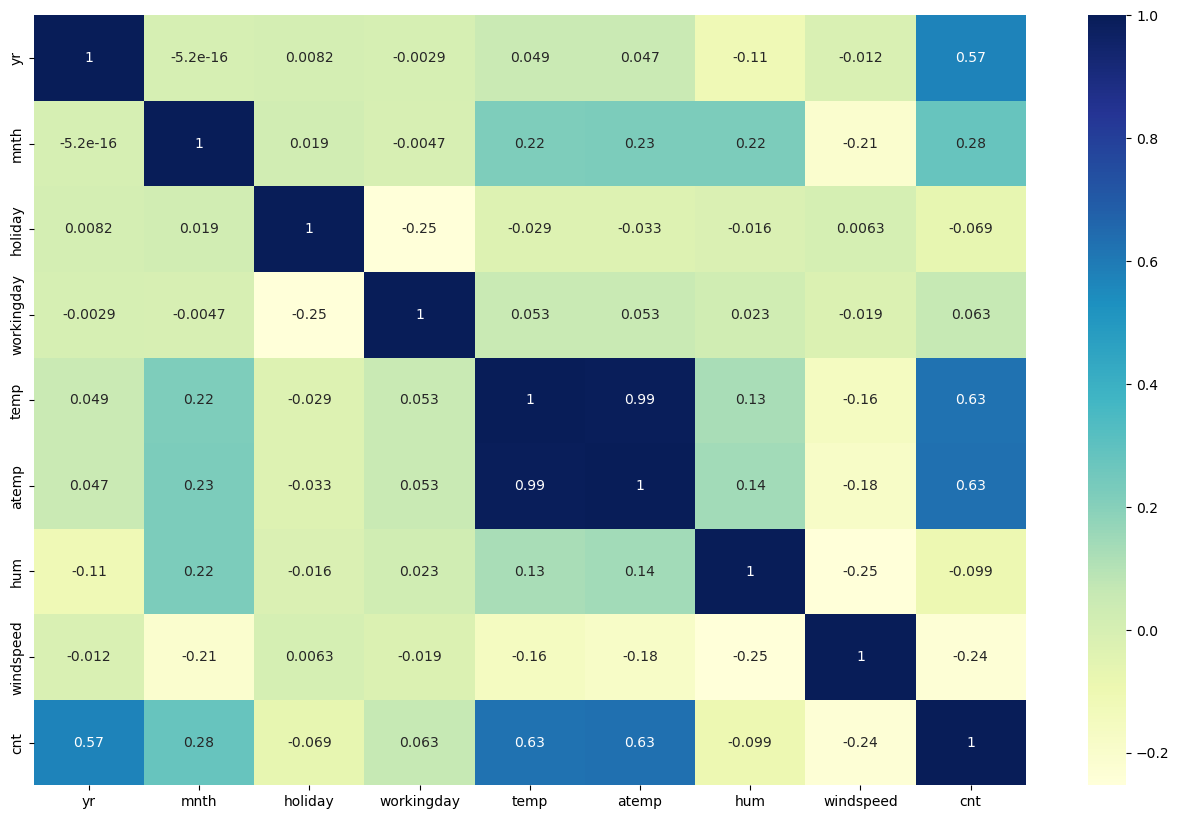

In [77]:
# based on above graphs we can say that temp and atemp have a correlation
#lets check the correlation matrix 
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [78]:
#correlation between temp and atemp is 0.99 
#we can drop temp and consider atemp

df.drop(['temp'],axis=1,inplace=True)


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 62.9+ KB


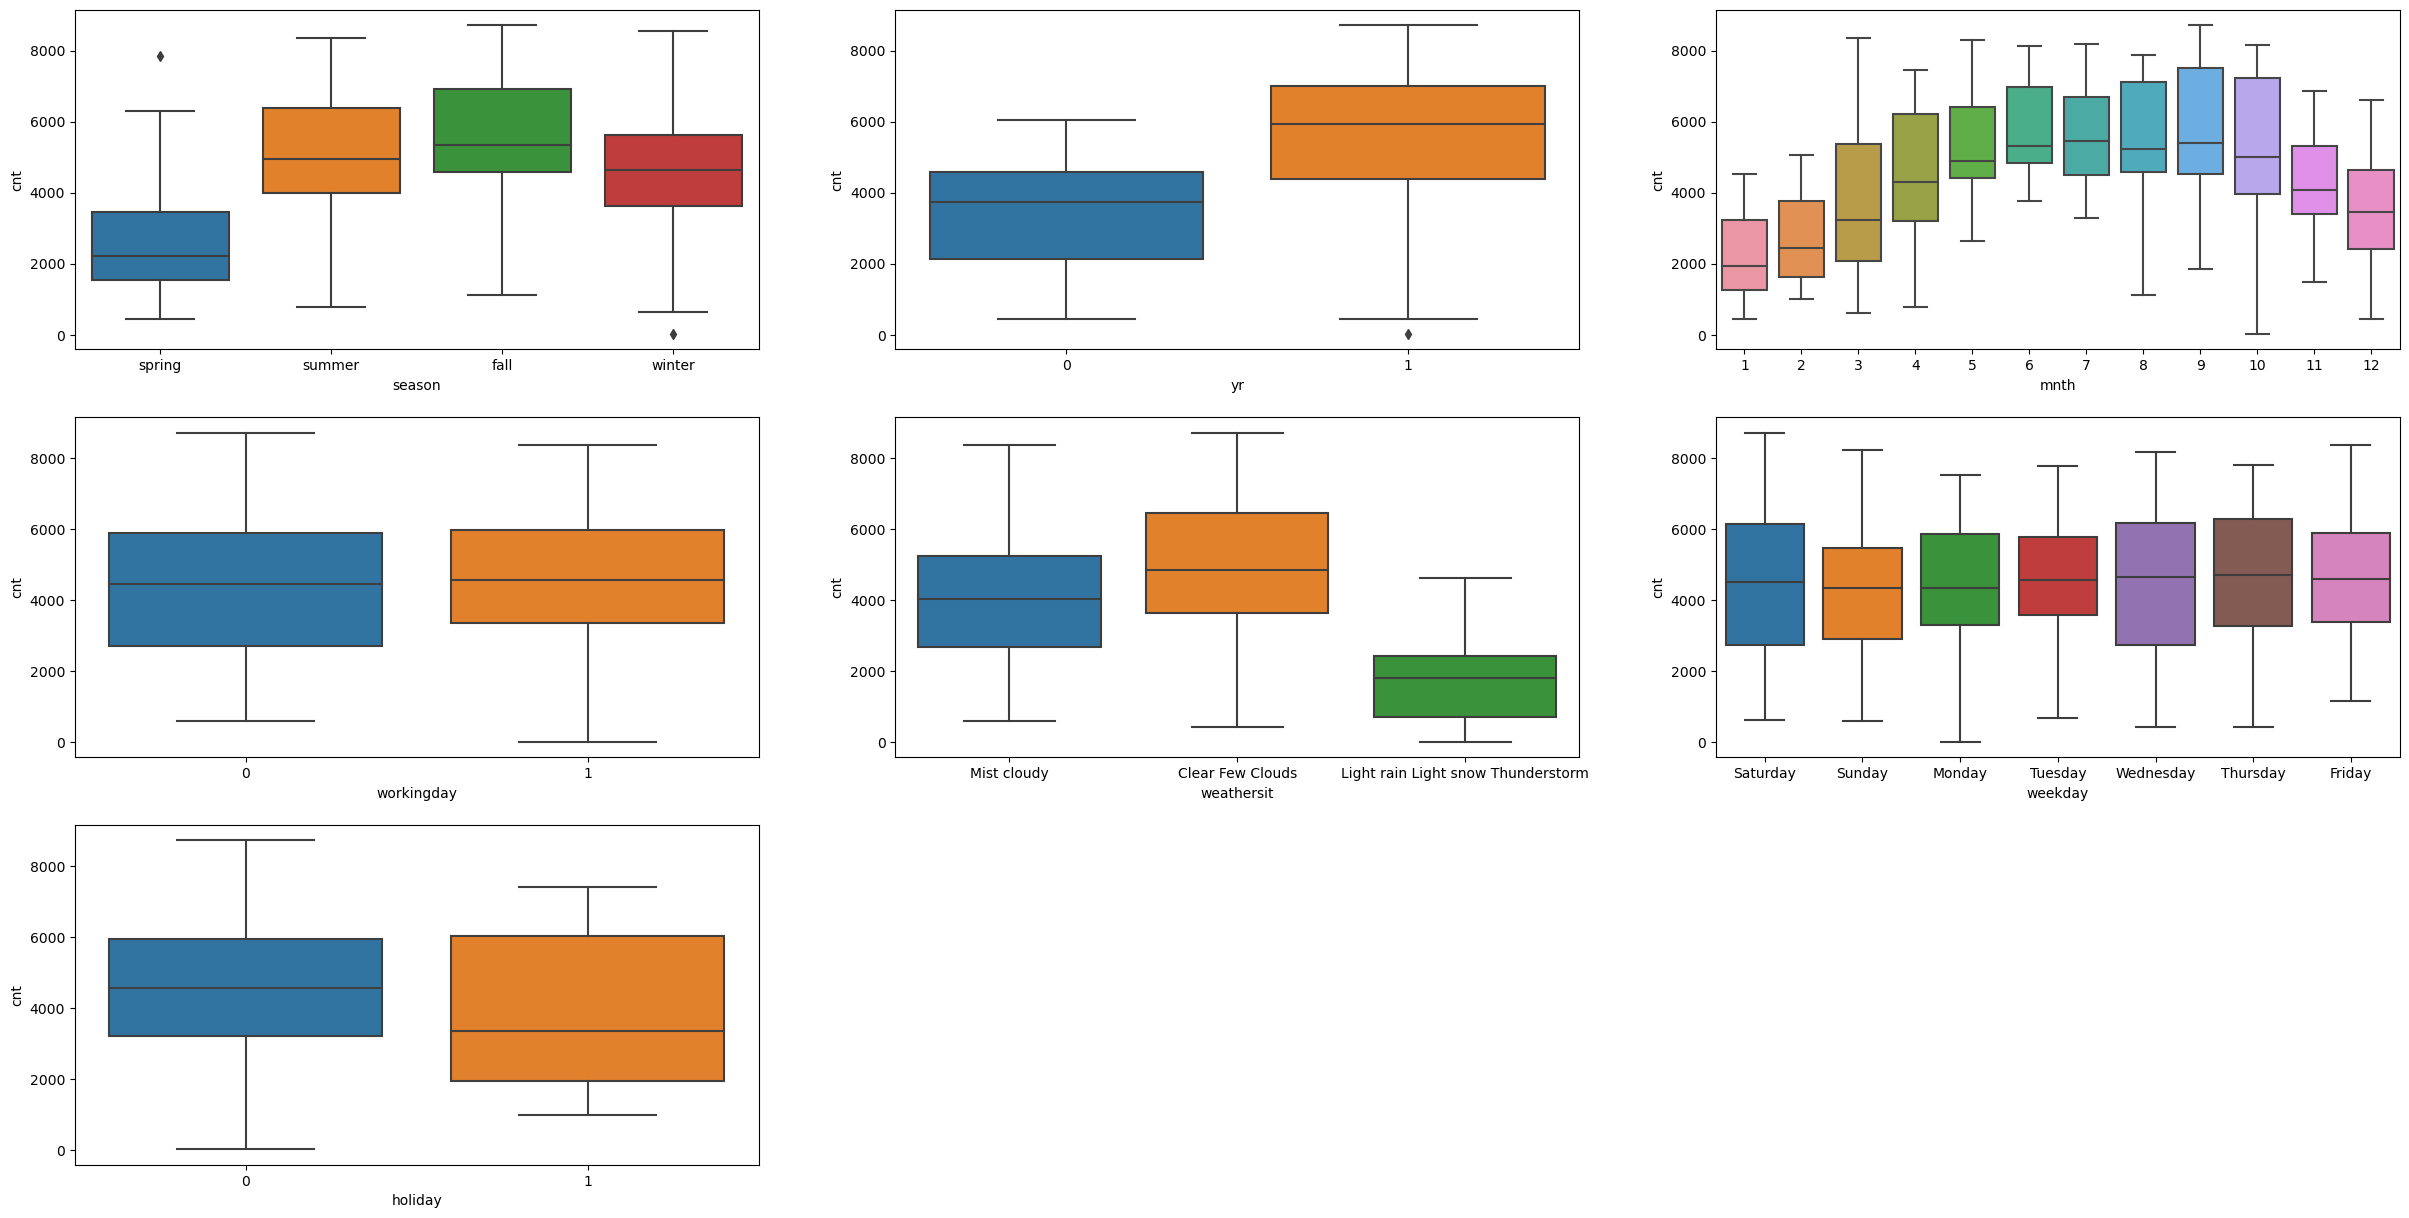

In [80]:
#Visualising categorical Variables using boxplots to understand data better
plt.figure(figsize=(30, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)#yr','mnth','workingday','weathersit','weekday'
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.show()

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 62.9+ KB


###Create dummy variables


In [82]:
#Convert variables to object type
df['mnth']=df['mnth'].astype(object)
df['season']=df['season'].astype(object)
df['weathersit']=df['weathersit'].astype(object)
df['weekday']=df['weekday'].astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [84]:
#CREATING DUMMY VARIABLES FOR CATEGORICAL DATA 

Season_condition=pd.get_dummies(df['season'],drop_first=True)
Weather_condition=pd.get_dummies(df['weathersit'],drop_first=True)
Day_of_week=pd.get_dummies(df['weekday'],drop_first=True)
Month=pd.get_dummies(df['mnth'],drop_first=True)

In [85]:
df=pd.concat([df,Season_condition],axis=1)
df=pd.concat([df,Weather_condition],axis=1)
df=pd.concat([df,Day_of_week],axis=1)
df=pd.concat([df,Month],axis=1)


In [86]:
#check data columns 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   season                              730 non-null    object 
 1   yr                                  730 non-null    int64  
 2   mnth                                730 non-null    object 
 3   holiday                             730 non-null    int64  
 4   weekday                             730 non-null    object 
 5   workingday                          730 non-null    int64  
 6   weathersit                          730 non-null    object 
 7   atemp                               730 non-null    float64
 8   hum                                 730 non-null    float64
 9   windspeed                           730 non-null    float64
 10  cnt                                 730 non-null    int64  
 11  spring                              730 non-n

In [32]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,...,3,4,5,6,7,8,9,10,11,12
0,spring,0,1,0,Saturday,0,Mist cloudy,18.18125,80.5833,10.749882,...,0,0,0,0,0,0,0,0,0,0
1,spring,0,1,0,Sunday,0,Mist cloudy,17.68695,69.6087,16.652113,...,0,0,0,0,0,0,0,0,0,0
2,spring,0,1,0,Monday,1,Clear Few Clouds,9.47025,43.7273,16.636703,...,0,0,0,0,0,0,0,0,0,0
3,spring,0,1,0,Tuesday,1,Clear Few Clouds,10.60610,59.0435,10.739832,...,0,0,0,0,0,0,0,0,0,0
4,spring,0,1,0,Wednesday,1,Clear Few Clouds,11.46350,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


In [87]:
#Deleting the orginal columns season.weathersit,weekday,mnth
df.drop(['season'],axis=1,inplace=True)
df.drop(['weathersit'],axis=1,inplace=True)

df.drop(['weekday'],axis=1,inplace=True)

df.drop(['mnth'],axis=1,inplace=True)




In [88]:
#check data set

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   yr                                  730 non-null    int64  
 1   holiday                             730 non-null    int64  
 2   workingday                          730 non-null    int64  
 3   atemp                               730 non-null    float64
 4   hum                                 730 non-null    float64
 5   windspeed                           730 non-null    float64
 6   cnt                                 730 non-null    int64  
 7   spring                              730 non-null    uint8  
 8   summer                              730 non-null    uint8  
 9   winter                              730 non-null    uint8  
 10  Light rain Light snow Thunderstorm  730 non-null    uint8  
 11  Mist cloudy                         730 non-n

In [89]:
#Now are data is ready to split
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [90]:
df_test.shape

(219, 29)

In [91]:
df_train.shape

(510, 29)

In [92]:
df_train.columns

Index([                                'yr',
                                  'holiday',
                               'workingday',
                                    'atemp',
                                      'hum',
                                'windspeed',
                                      'cnt',
                                   'spring',
                                   'summer',
                                   'winter',
       'Light rain Light snow Thunderstorm',
                              'Mist cloudy',
                                   'Monday',
                                 'Saturday',
                                   'Sunday',
                                 'Thursday',
                                  'Tuesday',
                                'Wednesday',
                                          2,
                                          3,
                                          4,
                                          5,
          

In [93]:
#Scaling the numerical data columns 
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [94]:
num_vars=['atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [95]:
df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.098039,0.078431,0.084314,0.074510,0.076471,0.096078,0.080392,0.086275,0.086275,0.084314
std,0.500429,0.157763,0.468282,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.297660,0.269113,0.278131,0.262857,0.266010,0.294988,0.272166,0.281045,0.281045,0.278131
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [96]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [97]:
df_train.shape

(510, 29)

In [98]:
#creating X AND Y
y_train = df_train.pop('cnt')
X_train = df_train

In [99]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [100]:
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,Light rain Light snow Thunderstorm,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,0.501133,0.575354,0.300794,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.391735,0.504508,0.188475,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [101]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   yr                                  510 non-null    int64  
 1   holiday                             510 non-null    int64  
 2   workingday                          510 non-null    int64  
 3   atemp                               510 non-null    float64
 4   hum                                 510 non-null    float64
 5   windspeed                           510 non-null    float64
 6   spring                              510 non-null    uint8  
 7   summer                              510 non-null    uint8  
 8   winter                              510 non-null    uint8  
 9   Light rain Light snow Thunderstorm  510 non-null    uint8  
 10  Mist cloudy                         510 non-null    uint8  
 11  Monday                              510 non-

In [102]:
#Importing RFE and Linear Regresssion

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [103]:
#RFE Approach for feature selection

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm,n_features_to_select=15,step=1)
rfe = rfe.fit(X_train, y_train)


In [104]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 8),
 ('winter', True, 1),
 ('Light rain Light snow Thunderstorm', True, 1),
 ('Mist cloudy', True, 1),
 ('Monday', False, 9),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 13),
 ('Tuesday', False, 10),
 ('Wednesday', False, 14),
 (2, False, 6),
 (3, False, 4),
 (4, False, 3),
 (5, True, 1),
 (6, False, 2),
 (7, False, 7),
 (8, True, 1),
 (9, True, 1),
 (10, False, 5),
 (11, False, 11),
 (12, False, 12)]

In [105]:
col = X_train.columns[rfe.support_]
col

Index([                                'yr',
                                  'holiday',
                               'workingday',
                                    'atemp',
                                      'hum',
                                'windspeed',
                                   'spring',
                                   'winter',
       'Light rain Light snow Thunderstorm',
                              'Mist cloudy',
                                 'Saturday',
                                   'Sunday',
                                          5,
                                          8,
                                          9],
      dtype='object')

In [106]:
X_train.columns[~rfe.support_]

Index([   'summer',    'Monday',  'Thursday',   'Tuesday', 'Wednesday',
                 2,           3,           4,           6,           7,
                10,          11,          12],
      dtype='object')

In [107]:
X_train_rfe = X_train[col]

In [108]:
X_train_rfe.head()

,yr,holiday,workingday,atemp,hum,windspeed,spring,winter,Light rain Light snow Thunderstorm,Mist cloudy,Saturday,Sunday,5,8,9
653,1,0,1,0.501133,0.575354,0.300794,0,1,0,0,0,0,0,0,0
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,1,0,0,1,1,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,1,0,0,0,0,1,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0,0,0,1,1,0,0,0,0


In [109]:
#Building model using STATSMODEL:

import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [110]:
lm = sm.OLS(y_train,X_train_rfe1).fit()

In [111]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     184.0
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          8.06e-186
Time:                        12:35:30   Log-Likelihood:                 503.92
No. Observations:                 510   AIC:                            -977.8
Df Residuals:                     495   BIC:                            -914.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [112]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,40.72
10,Saturday,9.93
11,Sunday,9.67
3,atemp,2.69
6,spring,2.65
1,holiday,2.53
4,hum,1.94
7,winter,1.92
9,Mist cloudy,1.57
13,8,1.31


In [113]:
X_train_rfe1.head()

,const,yr,holiday,workingday,atemp,hum,windspeed,spring,winter,Light rain Light snow Thunderstorm,Mist cloudy,Saturday,Sunday,5,8,9
653,1.0,1,0,1,0.501133,0.575354,0.300794,0,1,0,0,0,0,0,0,0
576,1.0,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,0,0
426,1.0,1,0,0,0.438975,0.640189,0.255342,1,0,0,1,1,0,0,0,0
728,1.0,1,0,0,0.200348,0.498067,0.663106,1,0,0,0,0,1,0,0,0
482,1.0,1,0,0,0.391735,0.504508,0.188475,0,0,0,1,1,0,0,0,0


In [114]:
#column 'workingday' has a very high VIF, so it can be dropped 
X_train_rfe=X_train_rfe.drop(['workingday'],axis=1)

In [115]:
import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [116]:
lm1 = sm.OLS(y_train,X_train_rfe1).fit()

In [117]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     184.0
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          8.06e-186
Time:                        12:38:14   Log-Likelihood:                 503.92
No. Observations:                 510   AIC:                            -977.8
Df Residuals:                     495   BIC:                            -914.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [118]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,23.78
2,atemp,13.92
4,windspeed,3.99
5,spring,2.71
6,winter,2.32
8,Mist cloudy,2.26
0,yr,2.05
12,8,1.44
11,5,1.37
13,9,1.27


In [119]:
#Column 'hum' has a high VIF so we can drop it
X_train_rfe=X_train_rfe.drop(['hum'],axis=1)

In [121]:
import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [122]:
lm2 = sm.OLS(y_train,X_train_rfe1).fit()

In [123]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     191.1
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          1.46e-183
Time:                        12:40:26   Log-Likelihood:                 495.80
No. Observations:                 510   AIC:                            -963.6
Df Residuals:                     496   BIC:                            -904.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [124]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,4.85
3,windspeed,3.94
0,yr,2.05
4,spring,1.73
7,Mist cloudy,1.54
5,winter,1.52
11,8,1.44
10,5,1.29
12,9,1.25
8,Saturday,1.23


In [125]:
#COLUMN atemp HAS A VERY HIGH VIF SO WE DROP IT
X_train_rfe=X_train_rfe.drop(['atemp'],axis=1)

In [126]:
 
X_train_rfe2 = sm.add_constant(X_train_rfe)
lm3 = sm.OLS(y_train,X_train_rfe2).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     140.3
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          5.97e-151
Time:                        12:41:36   Log-Likelihood:                 415.59
No. Observations:                 510   AIC:                            -805.2
Df Residuals:                     497   BIC:                            -750.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [127]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,2.87
0,yr,1.80
3,spring,1.67
6,Mist cloudy,1.52
4,winter,1.51
7,Saturday,1.21
8,Sunday,1.19
9,5,1.19
10,8,1.19
11,9,1.12


In [128]:
X_train_rfe.columns

Index([                                'yr',
                                  'holiday',
                                'windspeed',
                                   'spring',
                                   'winter',
       'Light rain Light snow Thunderstorm',
                              'Mist cloudy',
                                 'Saturday',
                                   'Sunday',
                                          5,
                                          8,
                                          9],
      dtype='object')

In [129]:
#Windspeed is the only variable with VIF >2 so we drop it
X_train_rfe=X_train_rfe.drop(['windspeed'],axis=1)

In [130]:
X_train_rfe3 = sm.add_constant(X_train_rfe)
lm4 = sm.OLS(y_train,X_train_rfe3).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     140.4
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          8.22e-145
Time:                        12:43:52   Log-Likelihood:                 398.42
No. Observations:                 510   AIC:                            -772.8
Df Residuals:                     498   BIC:                            -722.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [131]:
#column Saturday has very P value, so dropping it

X_train_rfe=X_train_rfe.drop(['Saturday'],axis=1)

In [132]:
X_train_rfe5 = sm.add_constant(X_train_rfe)
lm5 = sm.OLS(y_train,X_train_rfe5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     154.7
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          6.74e-146
Time:                        12:45:52   Log-Likelihood:                 398.37
No. Observations:                 510   AIC:                            -774.7
Df Residuals:                     499   BIC:                            -728.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [133]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.59
5,Mist cloudy,1.47
3,winter,1.36
2,spring,1.32
8,8,1.14
6,Sunday,1.13
7,5,1.13
9,9,1.10
4,Light rain Light snow Thunderstorm,1.05
1,holiday,1.04


In [134]:
#adding variable saturday to check if model improves
X_train_rfe['Saturday']=X_train['Saturday']
X_train_rfe.head()

,yr,holiday,spring,winter,Light rain Light snow Thunderstorm,Mist cloudy,Sunday,5,8,9,Saturday
653,1,0,0,1,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,0
426,1,0,1,0,0,1,0,0,0,0,1
728,1,0,1,0,0,0,1,0,0,0,0
482,1,0,0,0,0,1,0,0,0,0,1


In [135]:
X_train_rfe6 = sm.add_constant(X_train_rfe)
lm6 = sm.OLS(y_train,X_train_rfe6).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     140.4
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          8.22e-145
Time:                        12:47:55   Log-Likelihood:                 398.42
No. Observations:                 510   AIC:                            -772.8
Df Residuals:                     498   BIC:                            -722.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [136]:
#variable Saturday has very high p-value so we drop it

X_train_rfe=X_train_rfe.drop(['Saturday'],axis=1)

In [137]:
X_train_rfe7 = sm.add_constant(X_train_rfe)
lm7 = sm.OLS(y_train,X_train_rfe7).fit()
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     154.7
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          6.74e-146
Time:                        12:49:11   Log-Likelihood:                 398.37
No. Observations:                 510   AIC:                            -774.7
Df Residuals:                     499   BIC:                            -728.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [138]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.59
5,Mist cloudy,1.47
3,winter,1.36
2,spring,1.32
8,8,1.14
6,Sunday,1.13
7,5,1.13
9,9,1.10
4,Light rain Light snow Thunderstorm,1.05
1,holiday,1.04


In [139]:
#ADDING MONTH 2 TO CHECK IF MODEL IMPROVES
X_train_rfe[2]=X_train[2]
X_train_rfe.head()

,yr,holiday,spring,winter,Light rain Light snow Thunderstorm,Mist cloudy,Sunday,5,8,9,2
653,1,0,0,1,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,0
426,1,0,1,0,0,1,0,0,0,0,0
728,1,0,1,0,0,0,1,0,0,0,0
482,1,0,0,0,0,1,0,0,0,0,0


In [140]:
X_train_rfe8 = sm.add_constant(X_train_rfe)
lm8 = sm.OLS(y_train,X_train_rfe8).fit()
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     140.4
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          8.38e-145
Time:                        12:50:49   Log-Likelihood:                 398.39
No. Observations:                 510   AIC:                            -772.8
Df Residuals:                     498   BIC:                            -722.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [141]:
#MONTH 2 has very high p-value so we drop it
X_train_rfe=X_train_rfe.drop([2],axis=1)

In [142]:
X_train_rfe9 = sm.add_constant(X_train_rfe)
lm9 = sm.OLS(y_train,X_train_rfe9).fit()
print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     154.7
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          6.74e-146
Time:                        12:51:39   Log-Likelihood:                 398.37
No. Observations:                 510   AIC:                            -774.7
Df Residuals:                     499   BIC:                            -728.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [143]:
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.59
6,Mist cloudy,1.47
2,winter,1.36
3,spring,1.32
4,8,1.14
7,Sunday,1.13
9,5,1.13
1,9,1.10
8,Light rain Light snow Thunderstorm,1.05
5,holiday,1.04


In [144]:
#ADDING MONTH 7 TO CHECK IF MODEL IMPROVES
X_train_rfe[7]=X_train[7]
X_train_rfe.head()

,yr,holiday,spring,winter,Light rain Light snow Thunderstorm,Mist cloudy,Sunday,5,8,9,7
653,1,0,0,1,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,1
426,1,0,1,0,0,1,0,0,0,0,0
728,1,0,1,0,0,0,1,0,0,0,0
482,1,0,0,0,0,1,0,0,0,0,0


In [145]:
X_train_rfe10 = sm.add_constant(X_train_rfe)
lm10 = sm.OLS(y_train,X_train_rfe10).fit()
print(lm10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     144.0
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          7.13e-147
Time:                        12:52:30   Log-Likelihood:                 403.30
No. Observations:                 510   AIC:                            -782.6
Df Residuals:                     498   BIC:                            -731.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [146]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.69
5,Mist cloudy,1.48
3,winter,1.39
2,spring,1.34
6,Sunday,1.15
8,8,1.15
7,5,1.13
9,9,1.11
10,7,1.09
4,Light rain Light snow Thunderstorm,1.06


In [ ]:
#MODEL HAS IMPROVED SO WE KEEP MONTH 7


In [147]:
#ADDING MONTH 10 TO CHECK IF MODEL IMPROVES
X_train_rfe[10]=X_train[10]
X_train_rfe.head()

,yr,holiday,spring,winter,Light rain Light snow Thunderstorm,Mist cloudy,Sunday,5,8,9,7,10
653,1,0,0,1,0,0,0,0,0,0,0,1
576,1,0,0,0,0,0,0,0,0,0,1,0
426,1,0,1,0,0,1,0,0,0,0,0,0
728,1,0,1,0,0,0,1,0,0,0,0,0
482,1,0,0,0,0,1,0,0,0,0,0,0


In [148]:
X_train_rfe11 = sm.add_constant(X_train_rfe)
lm11 = sm.OLS(y_train,X_train_rfe11).fit()
print(lm11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     140.1
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          8.17e-151
Time:                        12:53:43   Log-Likelihood:                 415.26
No. Observations:                 510   AIC:                            -804.5
Df Residuals:                     497   BIC:                            -749.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [149]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,winter,1.89
0,yr,1.69
11,10,1.57
5,Mist cloudy,1.48
2,spring,1.34
6,Sunday,1.15
8,8,1.15
7,5,1.13
9,9,1.12
10,7,1.09


In [215]:
#MODEL HAS IMPROVED SO WE KEEP MONTH 10

In [150]:
#ADDING MONTH 11 TO CHECK IF MODEL IMPROVES
X_train_rfe[11]=X_train[11]
X_train_rfe.head()

,yr,holiday,spring,winter,Light rain Light snow Thunderstorm,Mist cloudy,Sunday,5,8,9,7,10,11
653,1,0,0,1,0,0,0,0,0,0,0,1,0
576,1,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,1,0,0,1,0,0,0,0,0,0,0
728,1,0,1,0,0,0,1,0,0,0,0,0,0
482,1,0,0,0,0,1,0,0,0,0,0,0,0


In [152]:
X_train_rfe12 = sm.add_constant(X_train_rfe)
lm12 = sm.OLS(y_train,X_train_rfe12).fit()
print(lm12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     129.1
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          8.85e-150
Time:                        12:54:47   Log-Likelihood:                 415.38
No. Observations:                 510   AIC:                            -802.8
Df Residuals:                     496   BIC:                            -743.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [153]:
#We can see high p-value for 11 so we drop it


X_train_rfe=X_train_rfe.drop([11],axis=1)

In [154]:
X_train_rfe13= sm.add_constant(X_train_rfe)
lm13 = sm.OLS(y_train,X_train_rfe13).fit()
print(lm13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     140.1
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          8.17e-151
Time:                        12:55:32   Log-Likelihood:                 415.26
No. Observations:                 510   AIC:                            -804.5
Df Residuals:                     497   BIC:                            -749.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [155]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,winter,1.89
0,yr,1.69
11,10,1.57
5,Mist cloudy,1.48
2,spring,1.34
6,Sunday,1.15
8,8,1.15
7,5,1.13
9,9,1.12
10,7,1.09


In [156]:
#ADDING MONTH 12 TO SEE MODEL IMPROVES
X_train_rfe[12]=X_train[12]
X_train_rfe.head()

,yr,holiday,spring,winter,Light rain Light snow Thunderstorm,Mist cloudy,Sunday,5,8,9,7,10,12
653,1,0,0,1,0,0,0,0,0,0,0,1,0
576,1,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,1,0,0,1,0,0,0,0,0,0,0
728,1,0,1,0,0,0,1,0,0,0,0,0,1
482,1,0,0,0,0,1,0,0,0,0,0,0,0


In [157]:
X_train_rfe14 = sm.add_constant(X_train_rfe)
lm14 = sm.OLS(y_train,X_train_rfe14).fit()
print(lm14.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     129.6
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          4.56e-150
Time:                        12:56:19   Log-Likelihood:                 416.07
No. Observations:                 510   AIC:                            -804.1
Df Residuals:                     496   BIC:                            -744.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [158]:
#We see high p-value for 12 so we drop it

X_train_rfe=X_train_rfe.drop([12],axis=1)

In [159]:
X_train_rfe15 = sm.add_constant(X_train_rfe)
lm15 = sm.OLS(y_train,X_train_rfe15).fit()
print(lm15.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     140.1
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          8.17e-151
Time:                        12:56:58   Log-Likelihood:                 415.26
No. Observations:                 510   AIC:                            -804.5
Df Residuals:                     497   BIC:                            -749.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [160]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,winter,1.89
0,yr,1.69
11,10,1.57
5,Mist cloudy,1.48
2,spring,1.34
6,Sunday,1.15
8,8,1.15
7,5,1.13
9,9,1.12
10,7,1.09


In [161]:
#ADDING MONDAY TO SEE MODEL IMPROVES
X_train_rfe['Monday']=X_train['Monday']
X_train_rfe.head()

,yr,holiday,spring,winter,Light rain Light snow Thunderstorm,Mist cloudy,Sunday,5,8,9,7,10,Monday
653,1,0,0,1,0,0,0,0,0,0,0,1,0
576,1,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,1,0,0,1,0,0,0,0,0,0,0
728,1,0,1,0,0,0,1,0,0,0,0,0,0
482,1,0,0,0,0,1,0,0,0,0,0,0,0


In [162]:
X_train_rfe16 = sm.add_constant(X_train_rfe)
lm16 = sm.OLS(y_train,X_train_rfe16).fit()
print(lm16.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     129.8
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          3.24e-150
Time:                        12:58:02   Log-Likelihood:                 416.42
No. Observations:                 510   AIC:                            -804.8
Df Residuals:                     496   BIC:                            -745.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [163]:
# We see high p-value for Monday so we drop it
X_train_rfe=X_train_rfe.drop(['Monday'],axis=1)

In [164]:
X_train_rfe17 = sm.add_constant(X_train_rfe)
lm17 = sm.OLS(y_train,X_train_rfe17).fit()
print(lm17.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     140.1
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          8.17e-151
Time:                        12:58:39   Log-Likelihood:                 415.26
No. Observations:                 510   AIC:                            -804.5
Df Residuals:                     497   BIC:                            -749.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [165]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,winter,1.89
0,yr,1.69
11,10,1.57
5,Mist cloudy,1.48
2,spring,1.34
6,Sunday,1.15
8,8,1.15
7,5,1.13
9,9,1.12
10,7,1.09


In [166]:
#ADDING TUESDAY TO SEE MODEL IMPROVES
X_train_rfe['Tuesday']=X_train['Tuesday']
X_train_rfe.head()

,yr,holiday,spring,winter,Light rain Light snow Thunderstorm,Mist cloudy,Sunday,5,8,9,7,10,Tuesday
653,1,0,0,1,0,0,0,0,0,0,0,1,1
576,1,0,0,0,0,0,0,0,0,0,1,0,1
426,1,0,1,0,0,1,0,0,0,0,0,0,0
728,1,0,1,0,0,0,1,0,0,0,0,0,0
482,1,0,0,0,0,1,0,0,0,0,0,0,0


In [167]:
X_train_rfe18 = sm.add_constant(X_train_rfe)
lm18 = sm.OLS(y_train,X_train_rfe18).fit()
print(lm18.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     129.2
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          7.38e-150
Time:                        12:59:27   Log-Likelihood:                 415.57
No. Observations:                 510   AIC:                            -803.1
Df Residuals:                     496   BIC:                            -743.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [168]:
# WE SEE HIGH P-VALUE FOR TUESDAY SO WE DROP IT
X_train_rfe=X_train_rfe.drop(['Tuesday'],axis=1)

In [169]:
X_train_rfe19 = sm.add_constant(X_train_rfe)
lm19 = sm.OLS(y_train,X_train_rfe19).fit()
print(lm19.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     140.1
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          8.17e-151
Time:                        12:59:58   Log-Likelihood:                 415.26
No. Observations:                 510   AIC:                            -804.5
Df Residuals:                     497   BIC:                            -749.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [170]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,winter,1.89
0,yr,1.69
11,10,1.57
5,Mist cloudy,1.48
2,spring,1.34
6,Sunday,1.15
8,8,1.15
7,5,1.13
9,9,1.12
10,7,1.09


In [171]:
#ADDING WEDNESDAY TO SEE MODEL IMPROVES
X_train_rfe['Wednesday']=X_train['Wednesday']
X_train_rfe.head()

,yr,holiday,spring,winter,Light rain Light snow Thunderstorm,Mist cloudy,Sunday,5,8,9,7,10,Wednesday
653,1,0,0,1,0,0,0,0,0,0,0,1,0
576,1,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,1,0,0,1,0,0,0,0,0,0,0
728,1,0,1,0,0,0,1,0,0,0,0,0,0
482,1,0,0,0,0,1,0,0,0,0,0,0,0


In [172]:
X_train_rfe20 = sm.add_constant(X_train_rfe)
lm20 = sm.OLS(y_train,X_train_rfe20).fit()
print(lm20.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     129.3
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          6.65e-150
Time:                        13:00:48   Log-Likelihood:                 415.67
No. Observations:                 510   AIC:                            -803.3
Df Residuals:                     496   BIC:                            -744.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [173]:
#High p-value for Wednesday so we drop it

X_train_rfe=X_train_rfe.drop(['Wednesday'],axis=1)

In [174]:
X_train_rfe21 = sm.add_constant(X_train_rfe)
lm21 = sm.OLS(y_train,X_train_rfe21).fit()
print(lm21.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     140.1
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          8.17e-151
Time:                        13:01:12   Log-Likelihood:                 415.26
No. Observations:                 510   AIC:                            -804.5
Df Residuals:                     497   BIC:                            -749.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [175]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,winter,1.89
0,yr,1.69
11,10,1.57
5,Mist cloudy,1.48
2,spring,1.34
6,Sunday,1.15
8,8,1.15
7,5,1.13
9,9,1.12
10,7,1.09


In [176]:
#ADDING THURSDAY TO SEE MODEL IMPROVES
X_train_rfe['Thursday']=X_train['Thursday']
X_train_rfe.head()

,yr,holiday,spring,winter,Light rain Light snow Thunderstorm,Mist cloudy,Sunday,5,8,9,7,10,Thursday
653,1,0,0,1,0,0,0,0,0,0,0,1,0
576,1,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,1,0,0,1,0,0,0,0,0,0,0
728,1,0,1,0,0,0,1,0,0,0,0,0,0
482,1,0,0,0,0,1,0,0,0,0,0,0,0


In [177]:
X_train_rfe22 = sm.add_constant(X_train_rfe)
lm22 = sm.OLS(y_train,X_train_rfe22).fit()
print(lm22.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     129.0
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          9.67e-150
Time:                        13:01:49   Log-Likelihood:                 415.29
No. Observations:                 510   AIC:                            -802.6
Df Residuals:                     496   BIC:                            -743.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [178]:
# High p- value for Thursday so we drop it
X_train_rfe=X_train_rfe.drop(['Thursday'],axis=1)

In [179]:
X_train_rfe23 = sm.add_constant(X_train_rfe)
lm23 = sm.OLS(y_train,X_train_rfe23).fit()
print(lm23.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     140.1
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          8.17e-151
Time:                        13:02:23   Log-Likelihood:                 415.26
No. Observations:                 510   AIC:                            -804.5
Df Residuals:                     497   BIC:                            -749.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [180]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,winter,1.89
0,yr,1.69
11,10,1.57
5,Mist cloudy,1.48
2,spring,1.34
6,Sunday,1.15
8,8,1.15
7,5,1.13
9,9,1.12
10,7,1.09


In [247]:
##We have considered all columns and checked.Now we stop the model building and check on which model can we choose
##Out all the models model lm14 seems to give good result so we choose it.

In [181]:
#Predict values
y_train_cnt = lm14.predict(X_train_rfe14)

In [182]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [183]:
#CALCULATING RESIDUALS

res=y_train - y_train_cnt

Text(0.5, 0, 'Errors')

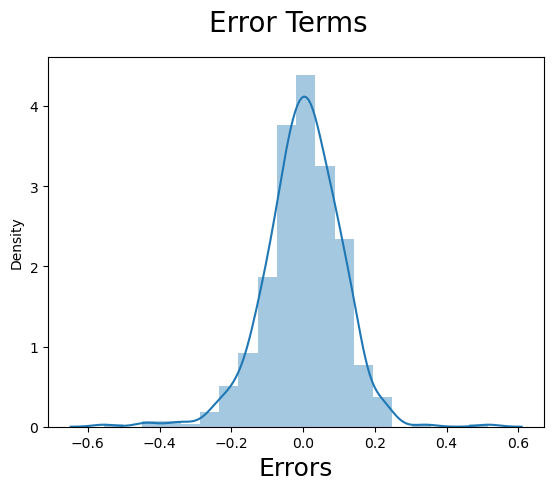

In [184]:
#Checking ASSUMPTION OF NORMALITY:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [185]:
#Checking columns
X_train_rfe14.columns

Index([                             'const',
                                       'yr',
                                  'holiday',
                                   'spring',
                                   'winter',
       'Light rain Light snow Thunderstorm',
                              'Mist cloudy',
                                   'Sunday',
                                          5,
                                          8,
                                          9,
                                          7,
                                         10,
                                         12],
      dtype='object')

In [186]:
print(X_train_rfe14.shape)
print(res.shape)

(510, 14)
(510,)


In [187]:
#Scaling the test data

num_vars=['atemp','hum','windspeed','cnt']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [188]:
#Creating x and y sets

y_test = df_test.pop('cnt')
X_test = df_test

In [189]:
X_train_new=X_train_rfe14.drop(['const'], axis=1)

In [190]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test

X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [191]:
X_train_rfe14.columns

Index([                             'const',
                                       'yr',
                                  'holiday',
                                   'spring',
                                   'winter',
       'Light rain Light snow Thunderstorm',
                              'Mist cloudy',
                                   'Sunday',
                                          5,
                                          8,
                                          9,
                                          7,
                                         10,
                                         12],
      dtype='object')

In [192]:
#Making predictions on the chosen model

y_pred = lm14.predict(X_test_new)

Text(0, 0.5, 'y_pred')

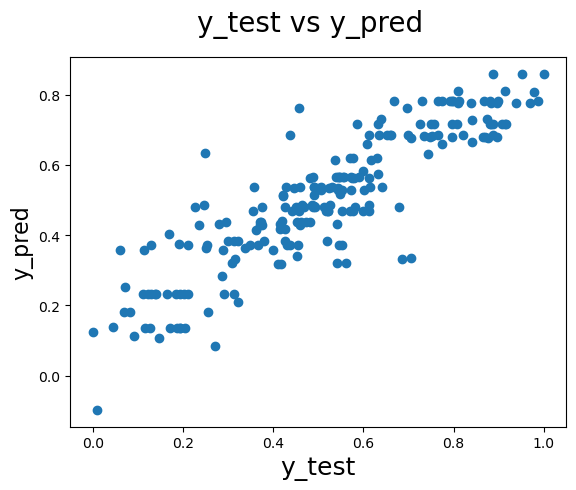

In [193]:
#CHECKING PREDICTED V/s TEST DATA 

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [261]:
##We have a model that seems good enough to predict demand of bikes. The actual and predicted cnt i.e demand significantly overlapped, thus indicating that the model is able to explain the change in demand very well.

In [194]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [195]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

0.11351894464712729

In [196]:
#Calculate the r square for test

r_squared = r2_score(y_test, y_pred)
r_squared

0.772797478833023

In [265]:
#R square of our model is 0.7727

In [197]:
X_t=X_train_new.iloc[:,0].values

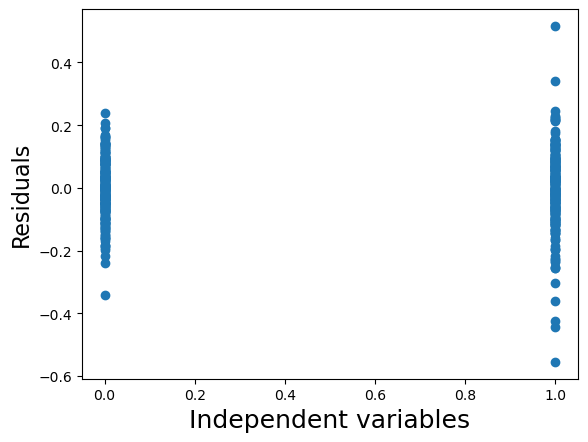

In [198]:
#PLotting the residuals to see if a pattern exists
#Checking assumption of homoscedasticity and autocorrelation
plt.figure()
plt.scatter(X_t,res)
fig.suptitle('Independent vars vs res', fontsize=20)              # Plot heading 
plt.xlabel('Independent variables', fontsize=18)                          # X-label
plt.ylabel('Residuals', fontsize=16)  
plt.show()

In [268]:
##When we have time series data (e.g. yearly data), then the regression is likely to suffer from autocorrelation because demand next year will certainly be dependent on demand this year. Hence, error terms in different observations will surely be correlated with each other.

In [199]:
X_train_new.head()

,yr,holiday,spring,winter,Light rain Light snow Thunderstorm,Mist cloudy,Sunday,5,8,9,7,10,12
653,1,0,0,1,0,0,0,0,0,0,0,1,0
576,1,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,1,0,0,1,0,0,0,0,0,0,0
728,1,0,1,0,0,0,1,0,0,0,0,0,1
482,1,0,0,0,0,1,0,0,0,0,0,0,0


In [270]:
print(X_train_rfe14.columns)
print(lm14.summary())

Index([                             'const',
                                       'yr',
                                  'holiday',
                                   'spring',
                                   'winter',
       'Light rain Light snow Thunderstorm',
                              'Mist cloudy',
                                   'Sunday',
                                          5,
                                          8,
                                          9,
                                          7,
                                         10],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     140.1
Date:                Sat, 10 Dec 2022   Prob (F-statistic):          8.17e-1

## FINAL CONCLUSIONS

Based on the final model selected, the equation for the best fitted line is :

cnt=0.2466 * yr + 0.0661*5 + 0.09663*8 + 0.1465*9 + 0.0678*7 + 0.1002*10 -0.1031*holiday -0.2383*spring - 0.0393*winter - 0.3307* light rain light snow thunderstorm - 0.0972* Mist Cloudy - 0.0512* Sunday + 0.4687


As evident from the coefficients, the demand will increase the highest when there’s an increase in the value of variables ‘yr’ and ‘month 9’. And demand will decrease the most when there’s increase in ‘Light rain Light snow Thunderstorm’ or the season is ‘spring’ and if it’s a ‘holiday’. 

Recommendations for the company: 

Demand will be higher in the months numbered 9, 10, 8,7,5 and the demand will be lowest when weather is light rainlight snow thunderstorm, when the season is spring or winter , when its a holiday or a sunday and weather is misty cold. 


And the top 3 features contributing to the demand are – 
1. which month is it ? (e.g. demand highest in month 9)
2. how’s the weather and which season is it? (e.g. demand lowest in winter and spring or when its cold and misty and when there’s thunderstorm)
3. if it’s a holiday. (e.g. on Sundays demand is low)




